In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import zipfile

local_zip = '/tmp/Medicinal-Leaf-Images.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
TRAINING_DIR = "/tmp/Medicinal-Leaf-Images/Train/"
training_datagen = ImageDataGenerator(rescale = 1/255,
                                      rotation_range = 40,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True,
                                      fill_mode = "nearest")

VALIDATION_DIR = "/tmp/Medicinal-Leaf-Images/Validation/"
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size = (150, 150),
                                                       class_mode = 'categorical',
                                                       batch_size = 85
                                                       )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size = (150, 150),
                                                              class_mode = "categorical",
                                                              batch_size = 40)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(30, activation='softmax')
])

model.summary()

Found 1647 images belonging to 30 classes.
Found 188 images belonging to 30 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_____________________________________

In [4]:
model.compile(loss = "categorical_crossentropy",
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

training_model = model.fit(train_generator, 
                           epochs = 130,
                           steps_per_epoch = 20,
                           validation_data = validation_generator,
                           validation_steps = 5,
                           verbose = 2)

Epoch 1/130
20/20 - 139s - loss: 3.4175 - accuracy: 0.0571 - val_loss: 3.3299 - val_accuracy: 0.0745
Epoch 2/130
20/20 - 129s - loss: 3.2937 - accuracy: 0.0874 - val_loss: 3.0290 - val_accuracy: 0.1330
Epoch 3/130
20/20 - 138s - loss: 3.0187 - accuracy: 0.1269 - val_loss: 2.6670 - val_accuracy: 0.1755
Epoch 4/130
20/20 - 138s - loss: 2.9680 - accuracy: 0.1396 - val_loss: 2.6662 - val_accuracy: 0.2074
Epoch 5/130
20/20 - 144s - loss: 2.8119 - accuracy: 0.1718 - val_loss: 3.1912 - val_accuracy: 0.1383
Epoch 6/130
20/20 - 138s - loss: 2.6211 - accuracy: 0.2131 - val_loss: 2.4163 - val_accuracy: 0.2872
Epoch 7/130
20/20 - 137s - loss: 2.5386 - accuracy: 0.2483 - val_loss: 2.1061 - val_accuracy: 0.3298
Epoch 8/130
20/20 - 136s - loss: 2.4420 - accuracy: 0.2617 - val_loss: 1.8942 - val_accuracy: 0.4468
Epoch 9/130
20/20 - 136s - loss: 2.3026 - accuracy: 0.2969 - val_loss: 2.0323 - val_accuracy: 0.3404
Epoch 10/130
20/20 - 146s - loss: 2.2489 - accuracy: 0.3339 - val_loss: 1.9031 - val_accura

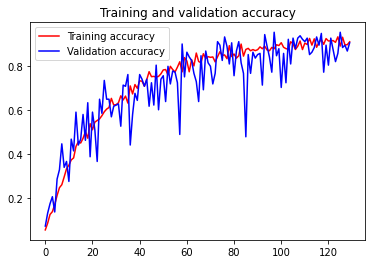

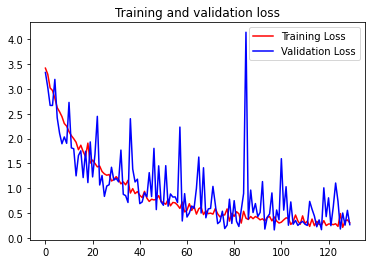

In [5]:
import matplotlib.pyplot as plt
acc = training_model.history['accuracy']
val_acc = training_model.history['val_accuracy']
loss = training_model.history['loss']
val_loss = training_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [17]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])

Saving to.jpg to to.jpg
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [18]:
export_dir = "/tmp/saved_model"
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /tmp/saved_model/assets


In [26]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [27]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [28]:
import pathlib
tflite_model_file = pathlib.Path('/tmp/medicinal_plant_leaf_model.tflite')
tflite_model_file.write_bytes(tflite_model)

6618512